# Predicción de la absorción de carbono en el océano

información del dataset: https://cdiac.ess-dive.lbl.gov/ftp/oceans/GLODAPv2/Data_Products/

## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/GLODAPv2 Merged Master File.csv')

In [3]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf

In [4]:
df.info

<bound method DataFrame.info of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf     don  donf     tdn  tdnf  

In [5]:
df.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute',
       'latitude', 'longitude',
       ...
       'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla',
       'chlaf'],
      dtype='object', length=101)

In [6]:
df.describe()

cruise       station          cast          year         month  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean     347.919987    894.160550      4.064220   2001.671232      6.132831   
std      190.853005   4303.049388     23.318664      5.990816      3.166003   
min        7.000000      0.000000      0.000000   1990.000000      1.000000   
25%      247.000000     31.000000      1.000000   1996.000000      3.000000   
50%      314.000000     74.000000      1.000000   2002.000000      6.000000   
75%      487.000000    174.250000      1.000000   2007.000000      9.000000   
max      719.000000  84987.000000    421.000000   2013.000000     12.000000   

                day          hour        minute      latitude     longitude  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean      15.874705      6.403932     16.270249     12.598935     -9.023130   
std        8.897353      7.692873     19.542834     44.609750     99.627372   
min        1.000000      0.000000      0.000000    -77.960600   -179.829000   
25%        8.000000      0.000000      0.000000    -28.056325    -76.202200   
50%       16.000000      2.000000      5.000000     17.937450    -16.669100   
75%       24.000000     13.000000     32.000000     52.733100     61.195500   
max       31.000000     23.000000     81.000000     90.000000    180.000000   

       ...           toc          tocf           doc          docf  \
count  ...  15260.000000  15260.000000  15260.000000  15260.000000   
mean   ...  -9906.619470      8.935780  -9086.577974      8.364220   
std    ...    960.088711      0.667418   2886.886196      2.011593   
min    ...  -9999.000000      2.000000  -9999.000000      2.000000   
25%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
50%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
75%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
max    ...    314.000000      9.000000    198.200000      9.000000   

                don          donf           tdn          tdnf          chla  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean   -9957.042363      8.970642  -9538.848864      8.678899  -9672.018820   
std      646.546733      0.452389   2098.681720      1.464493   1778.462076   
min    -9999.000000      2.000000  -9999.000000      2.000000  -9999.000000   
25%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
50%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
75%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
max       16.760000      9.000000     49.170000      9.000000     15.830000   

              chlaf  
count  15260.000000  
mean       8.771101  
std        1.244990  
min        2.000000  
25%        9.000000  
50%        9.000000  
75%        9.000000  
max        9.000000  

[8 rows x 101 columns]

In [7]:

df.isnull().sum().sort_values()


cruise      0
c13         0
sf6f        0
psf6        0
sf6         0
           ..
oxygenqc    0
oxygenf     0
oxygen      0
silicate    0
chlaf       0
Length: 101, dtype: int64

In [8]:
df = df.replace(-9999, np.nan)
df = df.fillna(df.mean())

In [9]:
df

cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...        toc  tocf        doc  docf       don  donf  \
0       -6.00250  ...  70.477786     9  46.858668     9  5.274138     9   
1       -5.99083  ...  70.477786     9  46.858668     9  5.274138     9   
2       -6.00250  ...  70.477786     9  46.858668     9  5.274138     9   
3       -5.99833  ...  70.477786     9  46.858668     9  5.274138     9   
4       -6.00500  ...  70.477786     9  46.858668     9  5.274138     9   
...          ...  ...        ...   ...        ...   ...       ...   ...   
15255   -5.97800  ...  70.477786     9  46.858668     9  5.274138     9   
15256   -5.74300  ...  70.477786     9  46.858668     9  5.274138     9   
15257   -5.36300  ...  70.477786     9  46.858668     9  5.274138     9   
15258   -5.74700  ...  70.477786     9  46.858668     9  5.274138     9   
15259   -5.73800  ...  70.477786     9  46.858668     9  5.274138     9   

             tdn  tdnf      chla  chlaf  
0      32.294761     9  0.464541      9  
1      32.294761     9  0.464541      9  
2      32.294761     9  0.464541      9  
3      32.294761     9  0.464541      9  
4      32.294761     9  0.464541      9  
...          ...   ...       ...    ...  
15255  32.294761     9  0.464541      9  
15256  32.294761     9  0.464541      9  
15257  32.294761     9  0.464541      9  
15258  32.294761     9  0.464541      9  
15259  32.294761     9  0.464541      9  

[15260 rows x 101 columns]

In [10]:
df['phts25p0f']

0        0
1        0
2        0
3        0
4        0
        ..
15255    2
15256    2
15257    2
15258    2
15259    2
Name: phts25p0f, Length: 15260, dtype: int64

## Feature Engineering

In [11]:
# Me que con las columnas que nos ineteresan

df = df[['year', 'latitude', 'longitude', 'pressure','depth','temperature', 'salinity', 'oxygen', 'nitrate', 'silicate', 'phosphate', 'phts25p0', 'talk','tco2']]

In [12]:
df.head(10)

year  latitude  longitude  pressure   depth  temperature  salinity  \
0  1992  -48.0058   -6.00250     149.0  148.70       1.8029    33.973   
1  1992  -49.0092   -5.99083     150.0  148.70       0.4917    33.937   
2  1992  -49.5000   -6.00250     148.0  147.30       0.2692    33.968   
3  1992  -48.0133   -5.99833      98.0   98.15       1.2629    33.892   
4  1992  -48.0108   -6.00500     499.0  495.20       2.2676    34.417   
5  1992  -46.9867   -5.94333     500.0  495.30       2.1100    34.464   
6  1992  -48.0083   -5.99667     299.0  296.30       1.7869    34.228   
7  1992  -47.0000   -6.00083     998.0  988.20       2.3434    34.654   
8  1992  -56.9942  -23.30920     299.0  295.10       1.4145    34.473   
9  1992  -52.9925   -5.98833     298.0  296.10       1.7545    34.537   

    oxygen  nitrate  silicate  phosphate  phts25p0    talk    tco2  
0  303.904  26.8560   20.6059    1.86878   7.71966  2275.0  2139.1  
1  333.809  26.4661   26.2708    1.88915   7.70487  2277.0  2146.9  
2  323.099  28.1257   31.2507    1.95005   7.68800  2279.0  2155.1  
3  339.096  25.0997   21.2908    1.65560   7.75015  2286.0  2137.9  
4  189.544  34.1691   60.8210    2.38598   7.55078  2312.0  2235.0  
5  183.673  33.3869   68.2381    2.43666   7.57866  2315.0  2227.7  
6  186.428  33.7833   65.0281    2.42693   7.55670  2317.0  2238.4  
7  177.571  31.9181   74.6707    2.20283   7.57211  2320.0  2234.4  
8  198.840  33.9724   77.4142    2.46710   7.55229  2321.0  2242.8  
9  175.427  35.4351   79.7534    2.40607   7.47408  2322.0  2270.7

##

<Axes: >

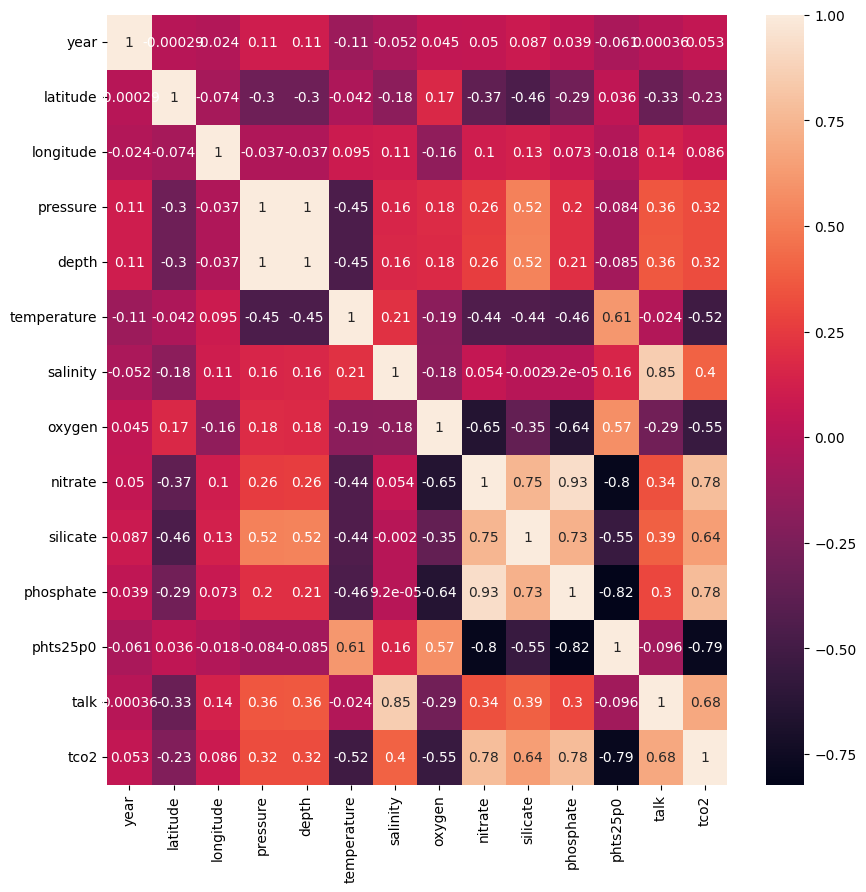

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

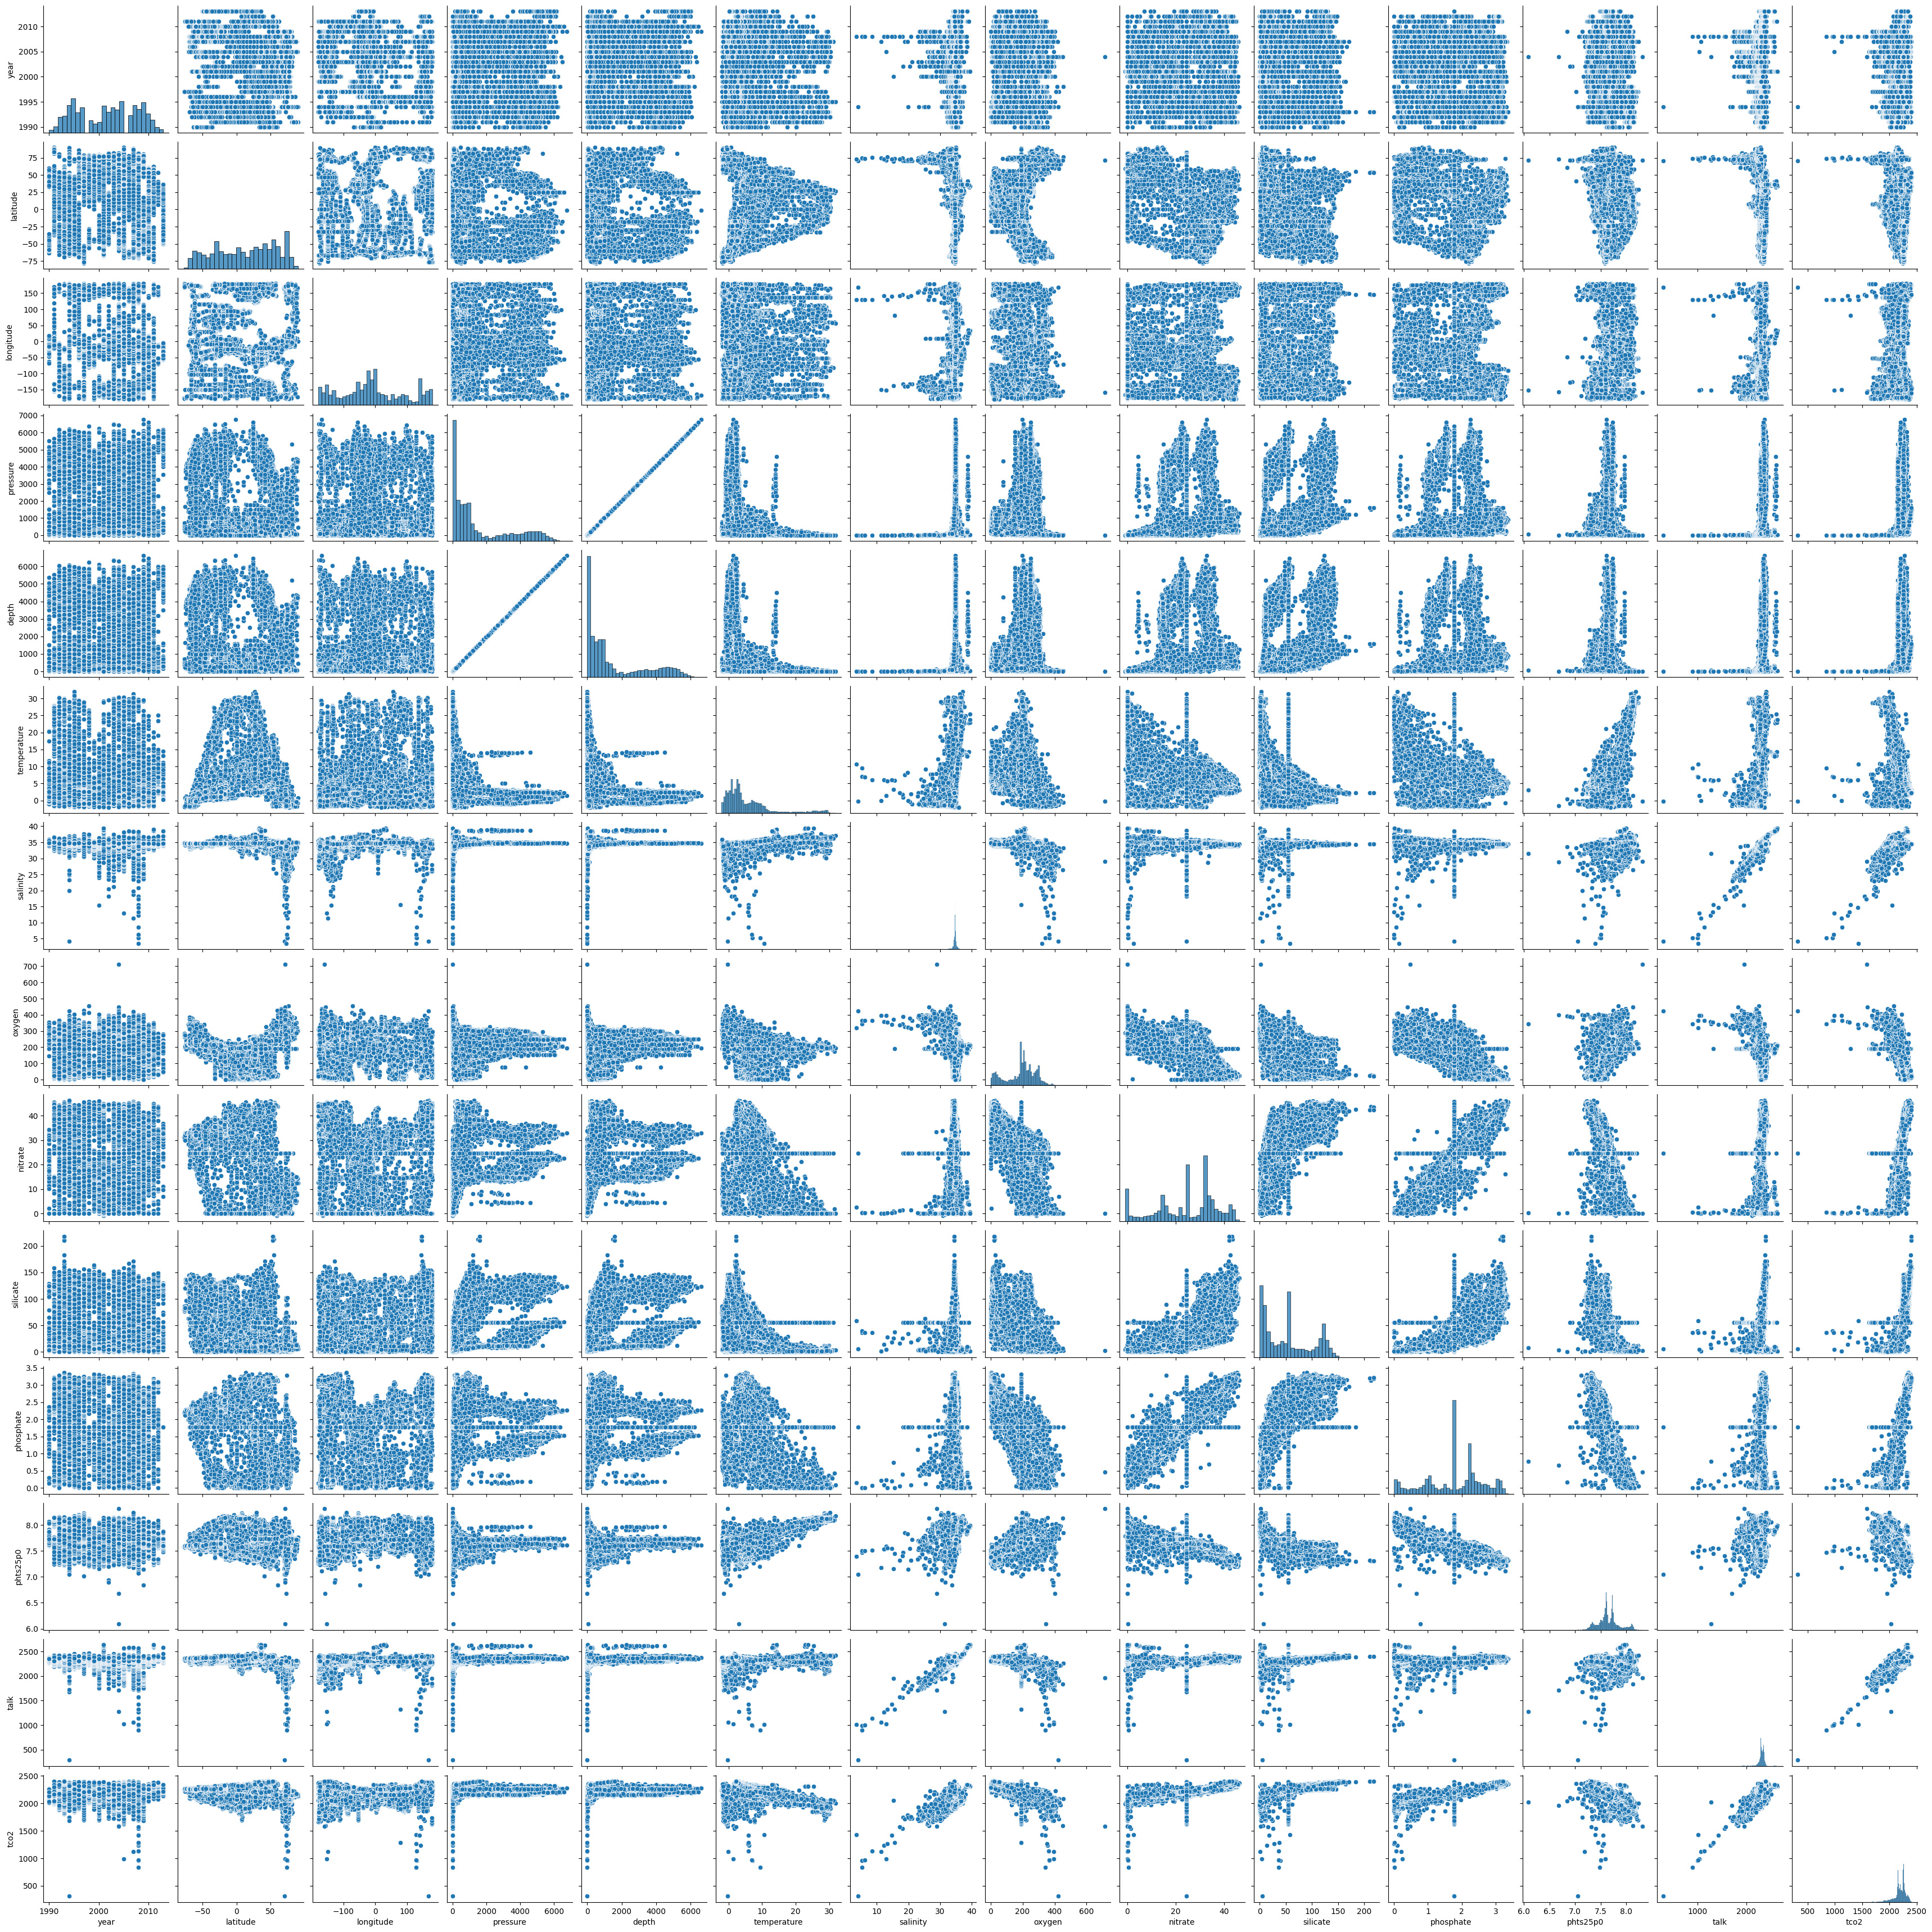

In [14]:
sns.pairplot(df)

## Modelado

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Linear regression

In [16]:
X = df.drop(['year','latitude','longitude', 'tco2'], axis=1)
y = df['tco2']

In [17]:
# Escalamos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Entrenamos modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_lr = lr.predict(X_test)

# Calculamos
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

print('Linear Regression - Mean Squared Error:', mse_lr)
print('Linear Regression - Mean Absolute Error (MAE):', mae_lr)
print('Linear Regression - R-squared:', r2_lr)
print('Linear Regression - Mean Absolute Percentage Error (MAPE):', mape_lr)

Linear Regression - Mean Squared Error: 71.62322481049429
Linear Regression - Mean Absolute Error (MAE): 5.358440137416881
Linear Regression - R-squared: 0.9941640389210309
Linear Regression - Mean Absolute Percentage Error (MAPE): 0.25188539235376295


In [21]:
lr.coef_

array([-1.91516476e+02,  1.92334122e+02, -1.10616336e+01, -1.84757160e+00,
       -1.47684394e-02,  3.57147518e+00, -4.49435280e+00, -1.37938996e-01,
       -7.44476708e+01,  7.12728015e+01])

In [22]:
X2 = df.drop(['year','latitude','longitude', 'tco2'], axis=1)

In [23]:
coef_df = pd.DataFrame(lr.coef_, index=X2.columns, columns=['Coeficientes'])

# imprimir los coeficientes de regresión
coef_df.sort_values


<bound method DataFrame.sort_values of              Coeficientes
pressure      -191.516476
depth          192.334122
temperature    -11.061634
salinity        -1.847572
oxygen          -0.014768
nitrate          3.571475
silicate        -4.494353
phosphate       -0.137939
phts25p0       -74.447671
talk            71.272802>

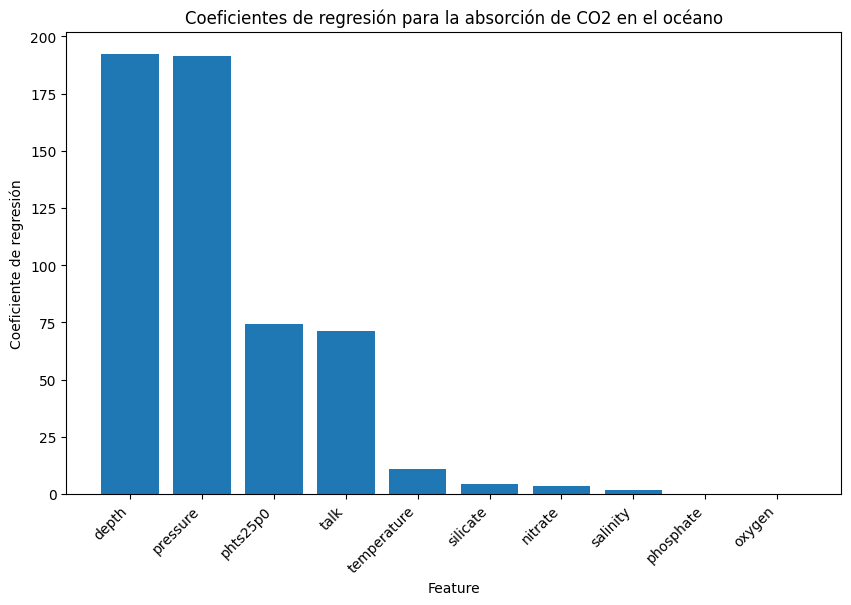

In [24]:
coef_df_sorted = coef_df.abs().sort_values('Coeficientes', ascending=False)

# graficar los coeficientes de regresión
plt.figure(figsize=(10, 6))
plt.bar(x=coef_df_sorted.index, height=coef_df_sorted['Coeficientes'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coeficiente de regresión')
plt.title('Coeficientes de regresión para la absorción de CO2 en el océano')
plt.show()

In [42]:
# quitamos phosphate y oxygen
X_2 = df.drop(['year','latitude','longitude', 'tco2', 'phosphate','oxygen'], axis=1)
y_2 = df['tco2']

In [43]:
# Escalamos
scaler = StandardScaler()
X_2= scaler.fit_transform(X_2)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Entrenamos modelo
lr_2 = LinearRegression()
lr_2.fit(X_2_train, y_2_train)

y_2_pred_lr = lr_2.predict(X_2_test)

# Calculamos
mse_lr_2 = mean_squared_error(y_2_test, y_2_pred_lr)
r2_lr_2 = r2_score(y_2_test, y_2_pred_lr)
mae_lr_2 = mean_absolute_error(y_2_test, y_2_pred_lr)
#mape_lr_2 = np.mean(np.abs((y_2_test, y_2_pred_lr) / y_2_test)) * 100

print('Linear Regression - Mean Squared Error:', mse_lr_2)
print('Linear Regression - Mean Absolute Error (MAE):', mae_lr_2)
print('Linear Regression - R-squared:', r2_lr_2)
#print('Linear Regression - Mean Absolute Percentage Error (MAPE):', mape_lr_2)

Linear Regression - Mean Squared Error: 71.63459852218251
Linear Regression - Mean Absolute Error (MAE): 5.360297953241183
Linear Regression - R-squared: 0.9941631121750081


In [27]:
# ha empeorado quitando columnas

### Regularización

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [29]:
X = df.drop(['year','latitude','longitude', 'tco2'], axis=1)
y = df['tco2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Entrenar los modelos con los datos de entrenamiento
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)


ElasticNet()

In [32]:
# Obtener los coeficientes de cada modelo
ridge_coefs = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coeficientes'])
lasso_coefs = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Lasso Coeficientes'])
elasticnet_coefs = pd.DataFrame(elasticnet.coef_, index=X.columns, columns=['ElasticNet Coeficientes'])

# Concatenar los coeficientes en un solo dataframe
coefs = pd.concat([ridge_coefs, lasso_coefs, elasticnet_coefs], axis=1)

# Imprimir los coeficientes
print(coefs)


             Ridge Coeficientes  Lasso Coeficientes  ElasticNet Coeficientes
pressure              -6.774247            0.000000                 1.332763
depth                  7.498479            0.000000                 1.374895
temperature          -11.375136          -10.207139               -19.468753
salinity              -1.930492            0.000000                17.725577
oxygen                -0.289483           -0.000000               -11.995051
nitrate                3.743427            0.953043                12.878454
silicate              -4.622063           -0.000000                 7.395687
phosphate             -0.112408            0.000000                13.781070
phts25p0             -74.352873          -74.470044               -29.062461
talk                  72.711427           69.554705                28.835918


In [33]:
# Predicciones con el conjunto de datos de test
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elasticnet = elasticnet.predict(X_test)

# Cálculo del Error Cuadrático Medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)

print("MSE Regresión Ridge: ", mse_ridge)
print("MSE Regresión Lasso: ", mse_lasso)
print("MSE Regresión ElasticNet: ", mse_elasticnet)


MSE Regresión Ridge:  28427168754.302208
MSE Regresión Lasso:  25810236910.561203
MSE Regresión ElasticNet:  4892200370.148967


/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [34]:
# este modelo no nos sirve tiene una gran cantidad de errores en la predicción

### Ensembles

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [36]:
X = df.drop(['year','latitude','longitude', 'tco2'], axis=1)
y = df['tco2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio de Random Forest:", mse)

Error cuadrático medio de Random Forest: 38.92762959725079


In [39]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio de Gradient Boosting:", mse)

Error cuadrático medio de Gradient Boosting: 102.36620271712877


In [41]:
from sklearn.model_selection import cross_val_score

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluar el modelo utilizando validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada para Random Forest:")
print("R2 medio:", rf_scores.mean())
print("Desviación estándar:", rf_scores.std())

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Evaluar el modelo utilizando validación cruzada
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada para Gradient Boosting:")
print("R2 medio:", gb_scores.mean())
print("Desviación estándar:", gb_scores.std())

Resultados de la validación cruzada para Random Forest:
R2 medio: 0.9875318683826265
Desviación estándar: 0.008638707515118995
Resultados de la validación cruzada para Gradient Boosting:
R2 medio: 0.9815746595557723
Desviación estándar: 0.008861476857005975
